In [1]:
# Clustering and Dimentionnality Reduction

<div class="alert alert-block alert-danger">

1. Import the CIFAR-10 dataset using the following code and create a new dataset containing only the following classes: "airplane," "automobile," "bird," and "cat."

<div/>

<div class="alert alert-block alert-warning">The CIFAR-10 dataset is composed of 60000 RGB images( 32x32 pixels), categorized into 10 classes with 6000 images per class. It is divided into 50000 training images and 10000 test images.
<div/>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode


In [ ]:


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


required_classes = [0, 1, 2, 3] 

y_train = y_train.flatten()
y_test = y_test.flatten()

train_filter = np.isin(y_train, required_classes)
test_filter = np.isin(y_test, required_classes)
print(train_filter)
print(len(train_filter))
print(test_filter)
print(len(test_filter))

x_train_filtered = x_train[train_filter]
y_train_filtered = y_train[train_filter]
x_test_filtered = x_test[test_filter]
y_test_filtered = y_test[test_filter]


y_train_filtered = np.array([np.where(required_classes == label)[0][0] for label in y_train_filtered])
y_test_filtered = np.array([np.where(required_classes == label)[0][0] for label in y_test_filtered])


print(f"Training data shape: {x_train_filtered.shape}")
print(f"Test data shape: {x_test_filtered.shape}")


[False False False ... False  True  True]
50000
[ True False False ... False  True False]
10000
Training data shape: (20000, 32, 32, 3)
Test data shape: (4000, 32, 32, 3)


2. Visualize some samples from the dataset with their corresponding labels.


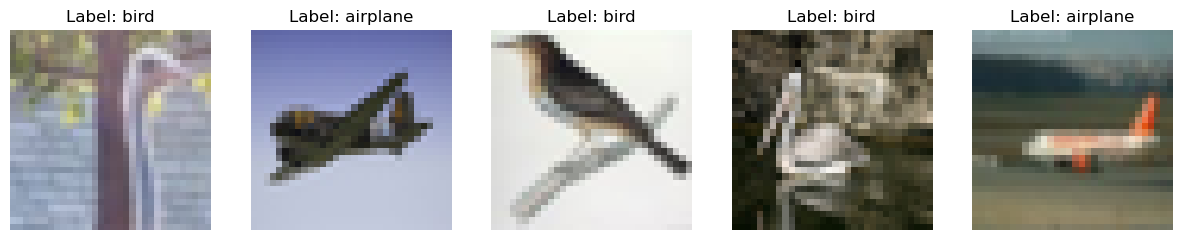

In [ ]:

fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    idx = np.random.randint(0, len(x_train_filtered))
    axes[i].imshow(x_train_filtered[idx], interpolation='nearest')
    axes[i].set_title(f"Label: {class_names[y_train_filtered[idx]]}")
    axes[i].axis('off')
plt.show()


3. Normalize the training data by dividing all values by 255.

In [ ]:

x_train_normalized = x_train_filtered / 255.0
x_test_normalized = x_test_filtered / 255.0


4. Visualize the data using a 2D plot by applying dimensionality reduction based on PCA with two components.

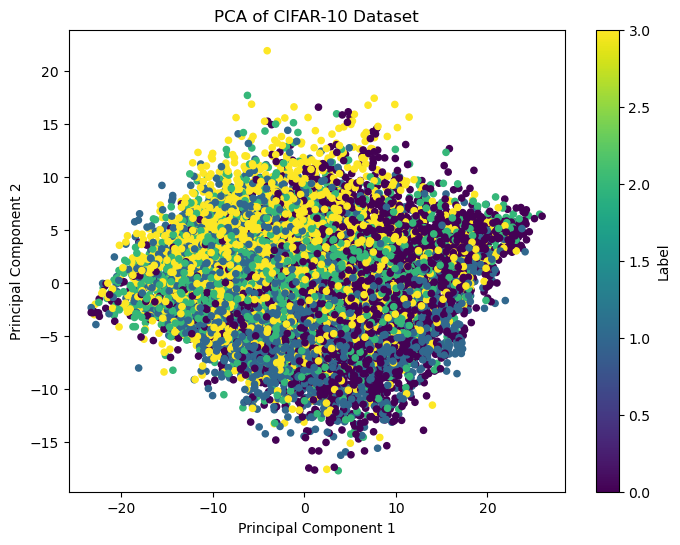

In [ ]:
from sklearn.decomposition import PCA


x_train_flattened = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flattened = x_test_normalized.reshape(x_test_normalized.shape[0], -1)


pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_flattened)
x_test_pca = pca.transform(x_test_flattened)


plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_filtered, cmap='viridis', s=20)
plt.colorbar(label='Label')
plt.title('PCA of CIFAR-10 Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


5. Apply the K-means algorithm, K-means with PCA (with a variance of 95%), and K-means with LDA (3 components) on the normalized training data

6. Visualize the data after clustering using a 2D plot (use PCA with 2 components for dimensionality reduction) for each model. What do you observe?

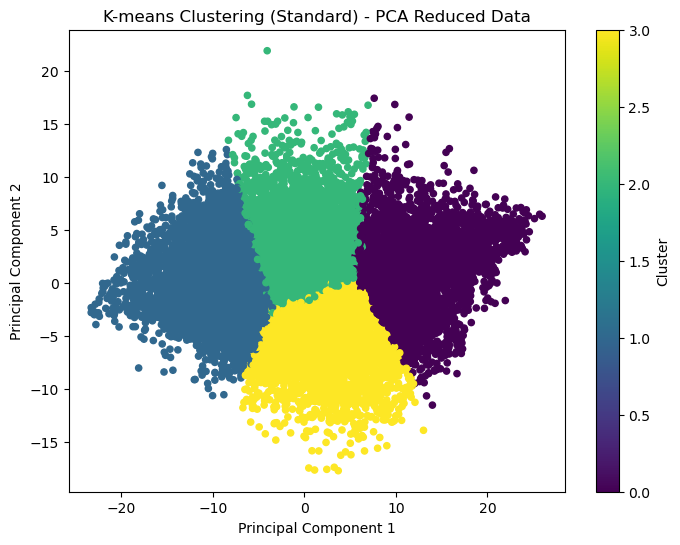

In [ ]:

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(x_train_flattened)


pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_flattened)

plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=kmeans_labels, cmap='viridis', s=20)
plt.colorbar(label='Cluster')
plt.title('K-means Clustering (Standard) - PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


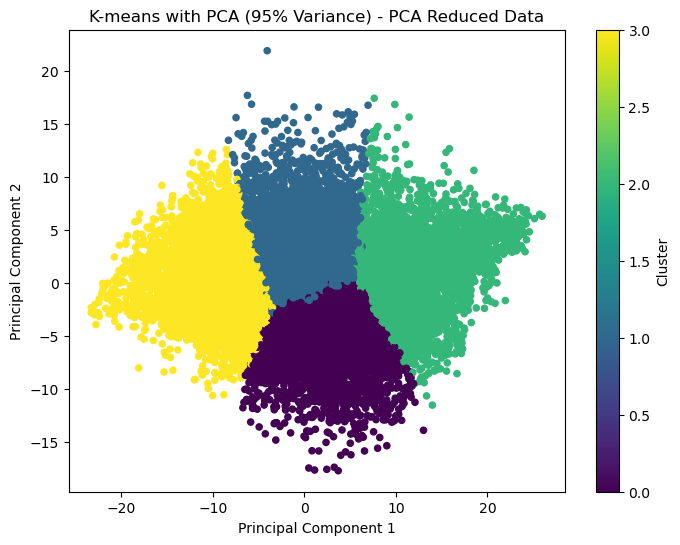

In [8]:

pca = PCA(0.95)
x_train_pca_95 = pca.fit_transform(x_train_flattened)


kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(x_train_pca_95)


pca_2d = PCA(n_components=2)
x_train_pca_2d = pca_2d.fit_transform(x_train_pca_95)

plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca_2d[:, 0], x_train_pca_2d[:, 1], c=kmeans_pca_labels, cmap='viridis', s=20)
plt.colorbar(label='Cluster')
plt.title('K-means with PCA (95% Variance) - PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


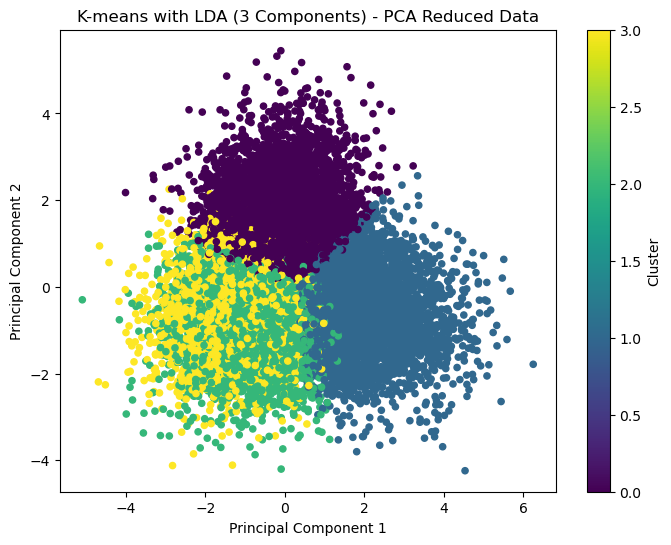

In [ ]:

lda = LDA(n_components=3)
x_train_lda = lda.fit_transform(x_train_flattened, y_train_filtered)


kmeans_lda = KMeans(n_clusters=4, random_state=42)
kmeans_lda_labels = kmeans_lda.fit_predict(x_train_lda)


pca_lda_2d = PCA(n_components=2)
x_train_lda_2d = pca_lda_2d.fit_transform(x_train_lda)

plt.figure(figsize=(8, 6))
plt.scatter(x_train_lda_2d[:, 0], x_train_lda_2d[:, 1], c=kmeans_lda_labels, cmap='viridis', s=20)
plt.colorbar(label='Cluster')
plt.title('K-means with LDA (3 Components) - PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



7. Compute the Davies-Bouldin score for all generated models.

In [ ]:


db_score_kmeans = davies_bouldin_score(x_train_flattened, kmeans_labels)
db_score_kmeans_pca = davies_bouldin_score(x_train_pca_95, kmeans_pca_labels)
db_score_kmeans_lda = davies_bouldin_score(x_train_lda, kmeans_lda_labels)

print(f"Davies-Bouldin score (Standard K-means): {db_score_kmeans}")
print(f"Davies-Bouldin score (K-means with PCA): {db_score_kmeans_pca}")
print(f"Davies-Bouldin score (K-means with LDA): {db_score_kmeans_lda}")


Davies-Bouldin score (Standard K-means): 2.4523434936763513
Davies-Bouldin score (K-means with PCA): 2.3578406803382452
Davies-Bouldin score (K-means with LDA): 1.0626322350259665


8. Display the confusion matrix and the classification reports for all models. What do you observe?

In [ ]:


def map_clusters_to_labels(true_labels, predicted_labels):
    mapped_labels = np.zeros_like(predicted_labels)
    for cluster in np.unique(predicted_labels):
        mask = (predicted_labels == cluster)
        mode_result = mode(true_labels[mask]) 

        if isinstance(mode_result.mode, np.ndarray):
            cluster_mode = mode_result.mode[0]   
        else:
            cluster_mode = mode_result.mode  
        mapped_labels[mask] = cluster_mode

    return mapped_labels
 """
true_labels = [0, 1, 1, 2, 0, 2]
predicted_labels = [0, 0, 1, 1, 0, 1]


mask = (predicted_labels == 0)  # [True, True, False, False, True, False]
 true_labels[0], true_labels[1], true_labels[4] → [0, 1, 0]
 mode=0
 
 mapped_labels [0, 1, 4] =0

['airplane', 'automobile', 'bird']
"""
mapped_labels_kmeans = map_clusters_to_labels(y_train_filtered, kmeans_labels)

mapped_labels_kmeans_pca = map_clusters_to_labels(y_train_filtered, kmeans_pca_labels)

mapped_labels_kmeans_lda = map_clusters_to_labels(y_train_filtered, kmeans_lda_labels)


cm_kmeans = confusion_matrix(y_train_filtered, mapped_labels_kmeans)
report_kmeans = classification_report(y_train_filtered, mapped_labels_kmeans, target_names=class_names[:4])

cm_kmeans_pca = confusion_matrix(y_train_filtered, mapped_labels_kmeans_pca)
report_kmeans_pca = classification_report(y_train_filtered, mapped_labels_kmeans_pca, target_names=class_names[:4])

cm_kmeans_lda = confusion_matrix(y_train_filtered, mapped_labels_kmeans_lda)
report_kmeans_lda = classification_report(y_train_filtered, mapped_labels_kmeans_lda, target_names=class_names[:4])


print("Confusion Matrix (Standard K-means):")
print(cm_kmeans)
print("\nClassification Report (Standard K-means):")
print(report_kmeans)

print("Confusion Matrix (K-means with PCA):")
print(cm_kmeans_pca)
print("\nClassification Report (K-means with PCA):")
print(report_kmeans_pca)


print("Confusion Matrix (K-means with LDA):")
print(cm_kmeans_lda)
print("\nClassification Report (K-means with LDA):")
print(report_kmeans_lda)


Confusion Matrix (Standard K-means):
[[1802 1438    0 1760]
 [ 566 1647    0 2787]
 [ 824  681    0 3495]
 [ 608  714    0 3678]]

Classification Report (Standard K-means):
              precision    recall  f1-score   support

    airplane       0.47      0.36      0.41      5000
  automobile       0.37      0.33      0.35      5000
        bird       0.00      0.00      0.00      5000
         cat       0.31      0.74      0.44      5000

    accuracy                           0.36     20000
   macro avg       0.29      0.36      0.30     20000
weighted avg       0.29      0.36      0.30     20000

Confusion Matrix (K-means with PCA):
[[1802 1436    0 1762]
 [ 566 1646    0 2788]
 [ 825  678    0 3497]
 [ 609  713    0 3678]]

Classification Report (K-means with PCA):
              precision    recall  f1-score   support

    airplane       0.47      0.36      0.41      5000
  automobile       0.37      0.33      0.35      5000
        bird       0.00      0.00      0.00      5000
  

c:\Users\Tayeb Kahia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tayeb Kahia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tayeb Kahia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tayeb Kahia\a

9. Display some misclassifications for the best model (image with the true label and predicted label).

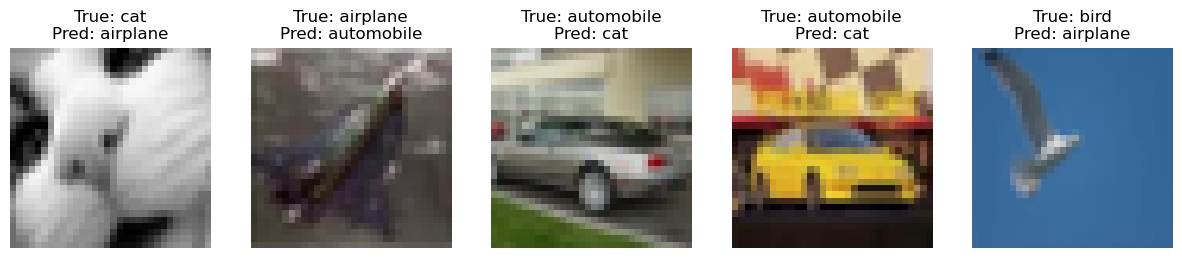

In [ ]:
misclassified_idx = np.where(mapped_labels_kmeans_lda != y_train_filtered)[0]

fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    idx = np.random.choice(misclassified_idx)  # Randomly select misclassified sample
    axes[i].imshow(x_train_filtered[idx])
    axes[i].set_title(f"True: {class_names[y_train_filtered[idx]]}\nPred: {class_names[mapped_labels_kmeans_lda[idx]]}")
    axes[i].axis('off')
plt.show()


10. Try to enhance the performance of the best model.


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_normalized.reshape(x_train_normalized.shape[0], -1)) # Scale the normalized data


pca = PCA(n_components=50, random_state=42)  # Use higher dimensions to retain information
x_train_pca = pca.fit_transform(x_train_scaled) # Use the scaled data for PCA

kmeans = KMeans(n_clusters=4, n_init=20, max_iter=300, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(x_train_pca)


sil_score = silhouette_score(x_train_pca, kmeans_labels)
print(f"Silhouette Score: {sil_score}")


mapped_labels = map_clusters_to_labels(y_train_filtered, kmeans_labels)
cm_kmeans = confusion_matrix(y_train_filtered, mapped_labels)
report_kmeans = classification_report(y_train_filtered, mapped_labels, target_names=class_names[:4])

print("Confusion Matrix:")
print(cm_kmeans)
print("\nClassification Report:")
print(report_kmeans)

Silhouette Score: 0.11691722772336714
Confusion Matrix:
[[1775 1425    0 1800]
 [ 540 1685    0 2775]
 [ 839  706    0 3455]
 [ 621  730    0 3649]]

Classification Report:
              precision    recall  f1-score   support

    airplane       0.47      0.35      0.40      5000
  automobile       0.37      0.34      0.35      5000
        bird       0.00      0.00      0.00      5000
         cat       0.31      0.73      0.44      5000

    accuracy                           0.36     20000
   macro avg       0.29      0.36      0.30     20000
weighted avg       0.29      0.36      0.30     20000



c:\Users\Tayeb Kahia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tayeb Kahia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tayeb Kahia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
